In [31]:
%matplotlib inline
import matplotlib
import numpy
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import ScalarFormatter
from sys import path
import h5py
from sys import path
path.append("/home/hkli/work/mylib/")
import plot_tool

[[              nan]
 [  4.94065646e-324]
 [  6.95335581e-310]
 [  6.95334917e-310]]
[[              nan]
 [  4.94065646e-324]
 [  6.95335581e-310]
 [  6.95334917e-310]]


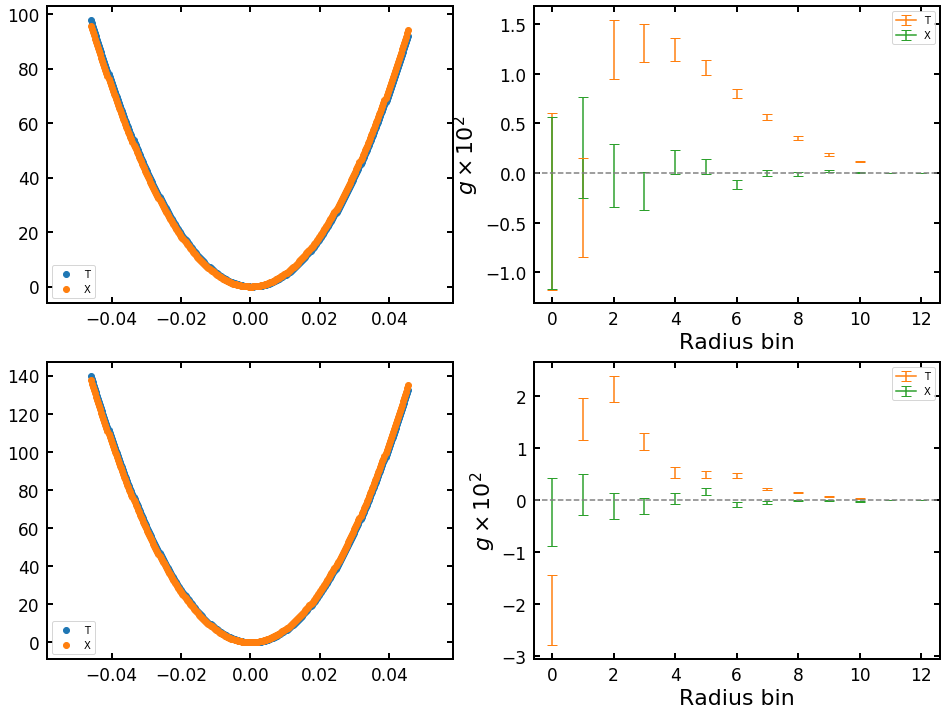

In [52]:
#  g_t & g_x of gg_lensing CFHT_cluster
data_path_1 = "/mnt/ddnfs/data_users/hkli/CFHT/gg_lensing/result/CFHT_cluster/"
data_path_2 = "/mnt/ddnfs/data_users/hkli/CFHT/gg_lensing/result/cmass/"
img = plot_tool.Image_Plot()
img.create_subfig(2,2)

radius_id = 12
h5f = h5py.File(data_path_1 + "%d.hdf5"%radius_id,"r")
chi = h5f["/chisq"].value/10000
gh = h5f["/shear"].value
print(h5f["/signal"].value)
h5f.close()
img.axs[0][0].scatter(gh, chi[0],label="T")
img.axs[0][0].scatter(gh, chi[1],label="X")
img.axs[0][0].legend()

h5f = h5py.File(data_path_2 + "%d.hdf5"%radius_id,"r")
chi = h5f["/chisq"].value/10000
gh = h5f["/shear"].value
print(h5f["/signal"].value)
h5f.close()
img.axs[1][0].scatter(gh, chi[0],label="T")
img.axs[1][0].scatter(gh, chi[1],label="X")
img.axs[1][0].legend()

for i in range(13):
    h5f_1 = h5py.File(data_path_1 + "%d.hdf5"%i,"r")
    h5f_2 = h5py.File(data_path_2 + "%d.hdf5"%i,"r")
    try:
        signal_1 = h5f_1["/signal"].value*100
        signal_2 = h5f_2["/signal"].value*100
        if i == 0:
            img.axs[0][1].errorbar(i,signal_1[0],signal_1[1],c="C1",capsize=5,label="T")
            img.axs[0][1].errorbar(i,signal_1[2],signal_1[3],c="C2",capsize=5,label="X")
            
            img.axs[1][1].errorbar(i,signal_2[0],signal_2[1],c="C1",capsize=5,label="T")
            img.axs[1][1].errorbar(i,signal_2[2],signal_2[3],c="C2",capsize=5,label="X")
        else:
            img.axs[0][1].errorbar(i,signal_1[0],signal_1[1],c="C1",capsize=5)
            img.axs[0][1].errorbar(i,signal_1[2],signal_1[3],c="C2",capsize=5)
            
            img.axs[1][1].errorbar(i,signal_2[0],signal_2[1],c="C1",capsize=5)
            img.axs[1][1].errorbar(i,signal_2[2],signal_2[3],c="C2",capsize=5)
    except:
        print("%d data not found"%i)
    finally:
        h5f_1.close()
        h5f_2.close()
        
img.axs[1][1].legend()
img.axs[0][1].legend()
img.tick_label(0,1,0,"$g \\times 10^2$")
img.tick_label(0,1,1,"Radius bin")
img.tick_label(1,1,0,"$g \\times 10^2$")
img.tick_label(1,1,1,"Radius bin")
xs = img.axs[0][1].set_xlim()
img.axs[0][1].plot([xs[0],xs[1]],[0,0],linestyle="--",c="grey")
img.axs[0][1].set_xlim(xs[0],xs[1])
xs = img.axs[1][1].set_xlim()
img.axs[1][1].plot([xs[0],xs[1]],[0,0],linestyle="--",c="grey")
img.axs[1][1].set_xlim(xs[0],xs[1])
img.show_img()

In [ ]:
#  g_t & g_x of gg_lensing
img = plot_tool.Image_Plot()
img.create_subfig(1,3)

radius_id = 11
h5f = h5py.File(data_path + "%d.hdf5"%radius_id,"r")
chi = h5f["/chisq"].value
gh = h5f["/shear"].value
h5f.close()
img.axs[0][0].scatter(gh, chi[0],label="T")
img.axs[0][0].scatter(gh, chi[1],label="X")
img.axs[0][0].legend()

for i in range(12):
    h5f = h5py.File(data_path + "%d.hdf5"%i,"r")
    try:
        signal = h5f["/signal"].value
        img.axs[0][1].errorbar(i,signal[0],signal[1],c="C1",capsize=5)
        img.axs[0][1].errorbar(i,signal[2],signal[3],c="C2",capsize=5)
        signal = numpy.abs(signal)
        img.axs[0][2].errorbar(i,signal[0],signal[1],c="C1",capsize=5)
        img.axs[0][2].errorbar(i,signal[2],signal[3],c="C2",capsize=5)
    except:
        print("%d data not found"%i)
    h5f.close()
img.axs[0][2].set_yscale("log")
ys = img.axs[0][2].set_ylim()
img.axs[0][2].set_ylim(ys[0], 150)
xs = img.axs[0][1].set_xlim()
img.axs[0][1].plot([xs[0],xs[1]],[0,0],linestyle="--",c="grey")
img.axs[0][1].set_xlim(xs[0],xs[1])
img.show_img()